In [1]:
import gym
import random

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
from stable_baselines3 import PPO
from Pinball_bot import PinBallBot

In [2]:
from math import inf


class BoxToBoxWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        env.reward_range = (-inf, inf)
        super().__init__(env)
        high = np.array(self.observation_space.high)[150:210,60:100,:]
        low = np.array(self.observation_space.low)[150:210,60:100,:]
        self.observation_space = gym.spaces.Box(low, high, high.shape)

    def observation(self, obs):
        new_obs = obs[150:210,60:100,:]
        return new_obs

In [13]:
env = BoxToBoxWrapper(gym.make('VideoPinball-v0', difficulty=1))
height, width, channels = env.observation_space.shape
actions = env.action_space.n

C:\Users\asmit\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [14]:
rr = env.reward_range
rr

(-inf, inf)

In [3]:
unwrapped = env.env.unwrapped

In [4]:
env.unwrapped.get_action_meanings()

['NOOP',
 'FIRE',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPFIRE',
 'RIGHTFIRE',
 'LEFTFIRE']

In [5]:
episodes = 1
img = plt.imshow(env.step(0))
obs = env.reset()
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    rendered = None
    while not done:
        env.render()
        # rendered = env.env.viewer.window
        action = random.choice([0,1,2,3,4,5])
        n_state, reward, done, info = env.step(action)
        # plt.show()
        # sys.exit(0)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

EasyProcessError: start error <EasyProcess cmd_param=['Xvfb', '-help'] cmd=['Xvfb', '-help'] oserror=[WinError 2] The system cannot find the file specified return_code=None stdout="None" stderr="None" timeout_happened=False>

In [6]:
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=20000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


ValueError: could not broadcast input array from shape (60,40,3) into shape (210,160,3)

In [7]:
import os
model_save = os.path.join('Training', 'Saved Models', 'CustomEnv_PPO_LQR_timeless')
model.save(model_save)

C:\Users\asmit\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\save_util.py:276: UserWarning: Path 'Training\Saved Models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [26]:
env = gym.make('VideoPinball-v0', difficulty=1)
obs = env.observation_space
state = env.reset()

In [7]:
env.reset()
n_state, reward, done, info = env.step(3)

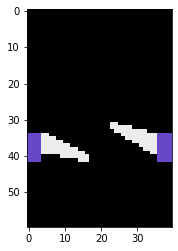

In [9]:
plt.imshow(n_state)

In [14]:
x = np.array(env.observation_space.high)

In [3]:
import my_env_util
from importlib import reload

reload(my_env_util)

from my_env_util import make_my_atari_env

In [4]:
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C

# env = BoxToBoxWrapper(make_my_atari_env('VideoPinball-v0', seed=0))
env = make_my_atari_env('VideoPinball-v0', seed=0)
# env = VecFrameStack(env, n_stack=4)

In [4]:
env.observation_space.shape

(3, 60, 40)

In [5]:
# ?env
env.reset()
obs, rewards, dones, info = env.step([0])
obs.shape

(1, 3, 60, 40)

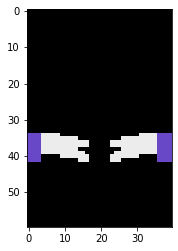

In [7]:
img = obs[0,:,:,:]
img = np.moveaxis(img, 0, -1)
plt.imshow(img)

In [8]:
env.action_space.sample()

0

In [10]:
model = A2C('CnnPolicy', env, verbose=1)
model.learn(total_timesteps=200000)

Using cuda device
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1.92e+03  |
|    ep_rew_mean        | 5e+03     |
| time/                 |           |
|    fps                | 63        |
|    iterations         | 100       |
|    time_elapsed       | 7         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -1.7      |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.403     |
|    value_loss         | 0.539     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 2.07e+03  |
|    ep_rew_mean        | 7.66e+03  |
| time/                 |           |
|    fps                | 73        |
|    iterations         | 200       |
|    time_elapsed       | 13        |
|    total_timesteps    | 1000  

In [11]:
from stable_baselines3.common.evaluation import evaluate_policy
evaluate_policy(model, env, n_eval_episodes=1, render=True)

C:\Users\asmit\AppData\Local\Programs\Python\Python39\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


(24223.0, 0.0)

In [6]:
model = A2C.load("model.zip")

In [7]:
obs = env.reset()

In [9]:
obs = env.reset()
dones = [False]
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

KeyboardInterrupt: 

In [12]:
model.save("model")

In [12]:
k={'sad':12,"jj":1}
def myFun(**kwargs):
    for key, value in kwargs.items():
        print ("%s == %s" %(key, value))
myFun(k)

TypeError: myFun() takes 0 positional arguments but 1 was given

In [18]:
from stable_baselines3.common.cmd_util import make_atari_env
env2 = make_atari_env('VideoPinball-v0', seed=0)

In [19]:
from stable_baselines3.common.env_checker import check_env

check_env(env2)

AssertionError: Your environment must inherit from the gym.Env class cf https://github.com/openai/gym/blob/master/gym/core.py